# Neural Network 

# Initial imports


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-04-21 18:11:08.333370: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Read in data

In [2]:
df = pd.read_csv(Path('../Resources/encoded_arbi_data.csv'))
df.head()

,hour_of_day,volume,buy_price,total_purchase_amount,sell_price,total_sale_amount,price_difference,is_profitable,gold_close,spy_close,...,buy_exchange_Binanceus,buy_exchange_Bitstamp,buy_exchange_Gemini,buy_exchange_Kraken,buy_exchange_Poloniex,sell_exchange_Binanceus,sell_exchange_Bitstamp,sell_exchange_Gemini,sell_exchange_Kraken,sell_exchange_Poloniex
0,23,0.008658,69300.0000,600.000000,69474.95000,601.514719,174.95000,0,17.95,518.51,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,23,989.184242,0.9103,900.454416,0.91553,905.627849,0.00523,0,17.95,518.51,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23,2.512527,179.1930,450.227208,179.66000,451.400558,0.46700,0,17.95,518.51,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,23,2.517840,179.1930,451.179225,179.66000,452.355056,0.46700,0,17.95,518.51,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,23,2.520005,179.1090,451.355600,179.66000,452.744123,0.55100,0,17.95,518.51,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# Create the features (X) and target (y) sets

In [3]:
X = df.drop(columns=['is_profitable'])
y = df['is_profitable']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_profitable, dtype: int64

# Create training and testing datasets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data

In [5]:
#Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model

In [6]:
# Define the model - deep neural net with three hidden layers
number_input_features = len(X.iloc[0])
number_of_outputs = 1
hidden_nodes_layer1 = (number_input_features + number_of_outputs)//2
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_of_outputs)//2
hidden_nodes_layer3 = (hidden_nodes_layer2 + number_of_outputs)//2

# Create a sequential neural network model
nn_1 = Sequential()

# Add the first hidden layer
nn_1.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_1.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
nn_1.add(Dense(units=hidden_nodes_layer3, activation="relu"))


# Add the output layer
nn_1.add(Dense(units=number_of_outputs, activation="sigmoid"))


# Compile model

In [7]:
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model

In [8]:
deep_net_model_1 = nn_1.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
430/430 [==============================] - 9s 10ms/step - loss: 0.1234 - accuracy: 0.9793
Epoch 2/50
430/430 [==============================] - 5s 12ms/step - loss: 0.0605 - accuracy: 0.9793
Epoch 3/50
430/430 [==============================] - 5s 12ms/step - loss: 0.0532 - accuracy: 0.9793
Epoch 4/50
430/430 [==============================] - 5s 12ms/step - loss: 0.0488 - accuracy: 0.9793
Epoch 5/50
430/430 [==============================] - 5s 12ms/step - loss: 0.0454 - accuracy: 0.9793
Epoch 6/50
430/430 [==============================] - 8s 18ms/step - loss: 0.0423 - accuracy: 0.9793
Epoch 7/50
430/430 [==============================] - 6s 13ms/step - loss: 0.0397 - accuracy: 0.9801
Epoch 8/50
430/430 [==============================] - 6s 13ms/step - loss: 0.0376 - accuracy: 0.9812
Epoch 9/50
430/430 [==============================] - 6s 14ms/step - loss: 0.0365 - accuracy: 0.9850
Epoch 10/50
430/430 [==============================] - 6s 14ms/step - loss: 0.0346 - accura

# Plot the loss function

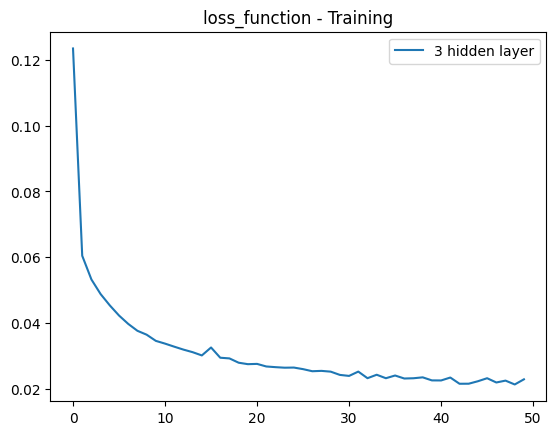

In [9]:
plt.plot(deep_net_model_1.history["loss"])
plt.title("loss_function - Training")
plt.legend(["3 hidden layer"])
plt.show()

# Evaluate the model

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

144/144 - 1s - loss: 0.0258 - accuracy: 0.9889 - 1s/epoch - 10ms/step
Loss: 0.02579183131456375, Accuracy: 0.9888622164726257


# Save model

In [11]:
#Create file path
file_path = Path('../Resources/nn_1.weights.h5')

# Export model as a HDF5 file
nn_1.save_weights(file_path)

# Evaluation

### What is Neural Networks?

Neural networks are a type of machine learning model inspired by the structure and function of the human brain. They consist of interconnected nodes or "neurons" organized into layers: an input layer, one or more hidden layers, and an output layer. Each connection between neurons has an associated weight, and the model learns by adjusting these weights based on the input data during training.

### Explain our Neural Network Model

How It Works:
- Input Layer: The input layer receives the initial data features.
    - Model Input Features: 35
- Hidden Layers: These layers process the input data through a series of weighted connections and apply activation functions. We used ReLU (Rectified Linear Unit), to introduce non-linearity and capture complex patterns in the data.
    - Model Hidden Layers: 3
- Output Layer: The final layer produces the model's predictions. We used Sigmoid as our activation function.
    - Model Output Activation: Sigmoid
- Epochs: This parameter refers to the number of times a machine learning algorithm iteratively goes through the entire dataset during the training process.
    - After experimenting with 20, 50, 100, and 200 epochs, 50 resulted in optimal performance.

### Model Outcome

The model achieved an impressive accuracy of 98.88%, meaning it correctly predicted whether a trade is profitable or not in 98.88% of the cases. This high accuracy demonstrates the model's strong performance and reliability in classifying trades based on the provided features.   


Our model's low binary cross-entropy loss of 0.0257 indicates that the predicted probabilities for each trade being profitable are very close to the actual labels. In other words, the model's predictions are highly accurate, with minimal errors when compared to the true outcomes.
